<a href="https://colab.research.google.com/github/riddhi-2080/Kaggle-Assignment/blob/master/ImageRec01_BasicCNN_v2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Import the dependencies


In [1]:
# libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,models,layers

#### 2. Read the CIFAR Dataset



In [2]:
data = tf.keras.datasets.cifar10

#### 3. Seggregating Labels and Images accordingly


In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()


In [4]:
# Check for data dimensions

print("Dimensions of Train Data: ", train_images.shape)
print("Dimensions of Test Data: ", test_images.shape)

Dimensions of Train Data:  (50000, 32, 32, 3)
Dimensions of Test Data:  (10000, 32, 32, 3)


In [5]:
# Show the first 10 labels in Train data

print(train_labels[0:10])


[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [6]:
# Display colour channels in any image from the dataset

# I am taking Image [3] here

print(train_images[3])

[[[ 28  25  10]
  [ 37  34  19]
  [ 38  35  20]
  ...
  [ 76  67  39]
  [ 81  72  43]
  [ 85  76  47]]

 [[ 33  28  13]
  [ 34  30  14]
  [ 32  27  12]
  ...
  [ 95  82  55]
  [ 96  82  56]
  [ 85  72  45]]

 [[ 39  32  15]
  [ 40  33  17]
  [ 57  50  33]
  ...
  [ 93  76  52]
  [107  89  66]
  [ 95  77  54]]

 ...

 [[ 83  73  52]
  [ 87  77  56]
  [ 84  74  52]
  ...
  [ 99  93  70]
  [ 90  84  61]
  [ 81  75  52]]

 [[ 88  72  51]
  [ 90  74  52]
  [ 93  77  56]
  ...
  [ 80  74  53]
  [ 76  70  49]
  [ 82  76  55]]

 [[ 97  78  56]
  [ 94  75  53]
  [ 93  75  53]
  ...
  [ 54  47  28]
  [ 63  56  37]
  [ 72  65  46]]]


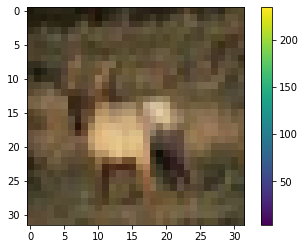

In [7]:
# Display the above Image according to the colour channels

plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

plt.show()

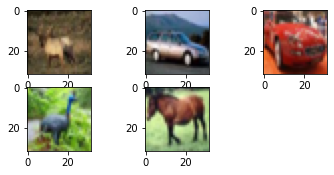

In [8]:
# Show the 3rd image and next 4 images too

for i in range(3,8):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i])
plt.show()

#### 4. Try Normalization


In [9]:
#Normalize

train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
print(train_images[3])

[[[0.10980392 0.09803922 0.03921569]
  [0.14509804 0.13333333 0.0745098 ]
  [0.14901961 0.1372549  0.07843137]
  ...
  [0.29803922 0.2627451  0.15294118]
  [0.31764706 0.28235294 0.16862745]
  [0.33333333 0.29803922 0.18431373]]

 [[0.12941176 0.10980392 0.05098039]
  [0.13333333 0.11764706 0.05490196]
  [0.1254902  0.10588235 0.04705882]
  ...
  [0.37254902 0.32156863 0.21568627]
  [0.37647059 0.32156863 0.21960784]
  [0.33333333 0.28235294 0.17647059]]

 [[0.15294118 0.1254902  0.05882353]
  [0.15686275 0.12941176 0.06666667]
  [0.22352941 0.19607843 0.12941176]
  ...
  [0.36470588 0.29803922 0.20392157]
  [0.41960784 0.34901961 0.25882353]
  [0.37254902 0.30196078 0.21176471]]

 ...

 [[0.3254902  0.28627451 0.20392157]
  [0.34117647 0.30196078 0.21960784]
  [0.32941176 0.29019608 0.20392157]
  ...
  [0.38823529 0.36470588 0.2745098 ]
  [0.35294118 0.32941176 0.23921569]
  [0.31764706 0.29411765 0.20392157]]

 [[0.34509804 0.28235294 0.2       ]
  [0.35294118 0.29019608 0.20392157]


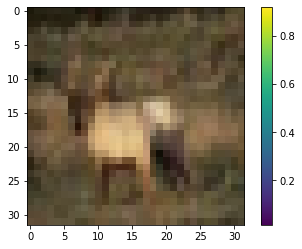

In [11]:
# Display the above Image after Normalization

# Notice the change in colour channels

plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

plt.show()

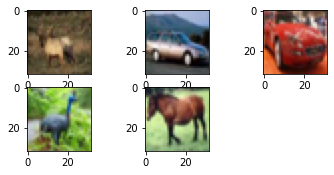

In [12]:
# Show the 3rd image and next 4 images too

for i in range(3,8):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i])
plt.show()

#### 5. Train the Model

In [13]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# execute for 5 epochs

history1 = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5022 - accuracy: 0.4558 - val_loss: 1.1973 - val_accuracy: 0.5680
Epoch 2/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1329 - accuracy: 0.5992 - val_loss: 1.0464 - val_accuracy: 0.6248
Epoch 3/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9847 - accuracy: 0.6526 - val_loss: 0.9672 - val_accuracy: 0.6592
Epoch 4/5
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8809 - accuracy: 0.6892 - val_loss: 0.9699 - val_accuracy: 0.6664
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8058 - accuracy: 0.7162 - val_loss: 0.8722 - val_accuracy: 0.6905


In [17]:
# execute for 10 epochs

history2 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7438 - accuracy: 0.7385 - val_loss: 0.8657 - val_accuracy: 0.7087
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6822 - accuracy: 0.7625 - val_loss: 0.8715 - val_accuracy: 0.7080
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6307 - accuracy: 0.7759 - val_loss: 0.9263 - val_accuracy: 0.6877
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5783 - accuracy: 0.7931 - val_loss: 0.9026 - val_accuracy: 0.7121
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5318 - accuracy: 0.8119 - val_loss: 0.8878 - val_accuracy: 0.7158
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4812 - accuracy: 0.8295 - val_loss: 0.9339 - val_accuracy: 0.7124
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4345 - accuracy: 0.8455 - val_loss: 1.0021 -

In [18]:
# execute for 15 epochs

history3 = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.2847 - accuracy: 0.8979 - val_loss: 1.2697 - val_accuracy: 0.6987
Epoch 2/15
1563/1563 [==============================] - 66s 43ms/step - loss: 0.2581 - accuracy: 0.9067 - val_loss: 1.3079 - val_accuracy: 0.7005
Epoch 3/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.2413 - accuracy: 0.9119 - val_loss: 1.4602 - val_accuracy: 0.6874
Epoch 4/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.2198 - accuracy: 0.9218 - val_loss: 1.4351 - val_accuracy: 0.6965
Epoch 5/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.1977 - accuracy: 0.9289 - val_loss: 1.5534 - val_accuracy: 0.7013
Epoch 6/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1867 - accuracy: 0.9325 - val_loss: 1.6918 - val_accuracy: 0.6893
Epoch 7/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1724 - accuracy: 0.9376 - val_loss: 1.7283 -

In [19]:
# execute for 20 epochs

history4 = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.1247 - accuracy: 0.9568 - val_loss: 2.2828 - val_accuracy: 0.6799
Epoch 2/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1205 - accuracy: 0.9589 - val_loss: 2.5979 - val_accuracy: 0.6787
Epoch 3/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1144 - accuracy: 0.9606 - val_loss: 2.5915 - val_accuracy: 0.6677
Epoch 4/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1116 - accuracy: 0.9620 - val_loss: 2.5294 - val_accuracy: 0.6801
Epoch 5/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1073 - accuracy: 0.9634 - val_loss: 2.6129 - val_accuracy: 0.6780
Epoch 6/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.1161 - accuracy: 0.9614 - val_loss: 2.6408 - val_accuracy: 0.6788
Epoch 7/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1088 - accuracy: 0.9635 - val_loss: 2.6027 -

In [20]:
# execute for 9 epochs

history5 = model.fit(train_images, train_labels, epochs=9, 
                    validation_data=(test_images, test_labels))

Epoch 1/9
1563/1563 [==============================] - 67s 43ms/step - loss: 0.0956 - accuracy: 0.9699 - val_loss: 3.2117 - val_accuracy: 0.6843
Epoch 2/9
1563/1563 [==============================] - 66s 43ms/step - loss: 0.0886 - accuracy: 0.9726 - val_loss: 3.1449 - val_accuracy: 0.6763
Epoch 3/9
1563/1563 [==============================] - 67s 43ms/step - loss: 0.0860 - accuracy: 0.9732 - val_loss: 3.2164 - val_accuracy: 0.6822
Epoch 4/9
1563/1563 [==============================] - 67s 43ms/step - loss: 0.0910 - accuracy: 0.9713 - val_loss: 3.2002 - val_accuracy: 0.6813
Epoch 5/9
1563/1563 [==============================] - 66s 43ms/step - loss: 0.0899 - accuracy: 0.9725 - val_loss: 3.3690 - val_accuracy: 0.6721
Epoch 6/9
1563/1563 [==============================] - 66s 42ms/step - loss: 0.0854 - accuracy: 0.9736 - val_loss: 3.3110 - val_accuracy: 0.6863
Epoch 7/9
1563/1563 [==============================] - 67s 43ms/step - loss: 0.0839 - accuracy: 0.9736 - val_loss: 3.3458 - val_ac

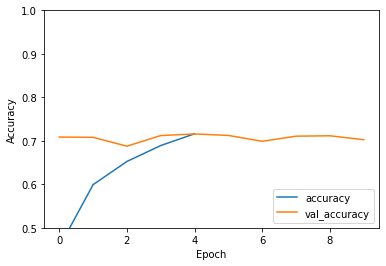

In [21]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

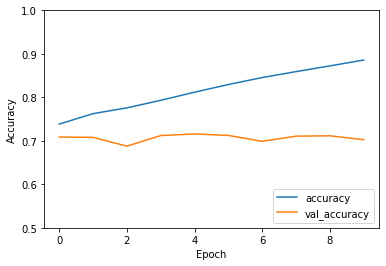

In [22]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

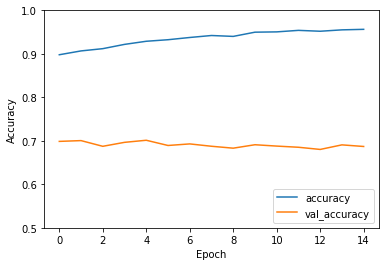

In [23]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

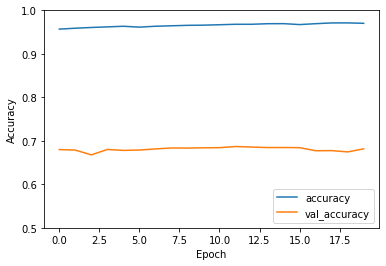

In [24]:
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

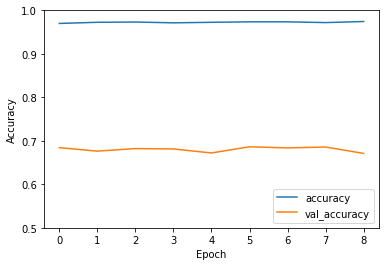

In [25]:
plt.plot(history5.history['accuracy'], label='accuracy')
plt.plot(history5.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')